<a href="https://githubtocolab.com/giswqs/geemap/blob/master/examples/notebooks/surface_water_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) if needed.

#  Mapping surface water dynamics using Earth Engine


Author: Qiusheng Wu ([Website](https://wetlands.io) - [GitHub](https://github.com/giswqs))

**Keyboard shortcuts for Jupyter notebook:**

- **Shift-Enter**: run cell, select below
- **Ctrl-Enter**: run selected cells
- **Alt-Enter**: run cell and insert below
- **Ctrl-/**: comment
- **Tab**: code completion or indent
- **Shift-Tab**: tooltip

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-geemap" data-toc-modified-id="Install-geemap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install geemap</a></span></li><li><span><a href="#Get-help" data-toc-modified-id="Get-help-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get help</a></span></li><li><span><a href="#Create-an-interactive-map" data-toc-modified-id="Create-an-interactive-map-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create an interactive map</a></span></li><li><span><a href="#Create-Landsat-timelapse" data-toc-modified-id="Create-Landsat-timelapse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Landsat timelapse</a></span></li><li><span><a href="#Select-the-best-cloud-free-image" data-toc-modified-id="Select-the-best-cloud-free-image-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Select the best cloud-free image</a></span></li><li><span><a href="#Get-image-properties" data-toc-modified-id="Get-image-properties-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get image properties</a></span></li><li><span><a href="#Calculate-NDWI" data-toc-modified-id="Calculate-NDWI-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculate NDWI</a></span></li><li><span><a href="#Extract-water" data-toc-modified-id="Extract-water-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extract water</a></span></li><li><span><a href="#Convert-raster-to-vector" data-toc-modified-id="Convert-raster-to-vector-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Convert raster to vector</a></span></li><li><span><a href="#Apply-the-algorithm-to-all-images" data-toc-modified-id="Apply-the-algorithm-to-all-images-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Apply the algorithm to all images</a></span></li><li><span><a href="#Create-a-split-panel-map-to-visualize-results" data-toc-modified-id="Create-a-split-panel-map-to-visualize-results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Create a split-panel map to visualize results</a></span></li><li><span><a href="#Export-results-to-Google-Drive" data-toc-modified-id="Export-results-to-Google-Drive-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Export results to Google Drive</a></span></li><li><span><a href="#Large-scale-surface-water-mapping" data-toc-modified-id="Large-scale-surface-water-mapping-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Large-scale surface water mapping</a></span></li><li><span><a href="#Use-JRC-Global-Surface-Water-Product" data-toc-modified-id="Use-JRC-Global-Surface-Water-Product-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Use JRC Global Surface Water Product</a></span></li></ul></div>

## Install geemap

To follow this tutorial, you need to install the [geemap](https://github.com/giswqs/geemap) Python package.Uncomment the following line to install and update the package to the latest version (v0.7.3). 

In [1]:
 !pip install -U geemap

You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for earthengine-api, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pyshp, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
Using legacy 'setup.py install' for httplib2shim, since package 'wheel' is not installed.
Using legacy 'setup.py install' for ipynb-py-convert, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pycrs, since package 'wheel' is not installed.
    Running setup.py install for httplib2shim: started
    Running setup.py install for httplib2shim: finished with status 'done'
    Running setup.py install for future: started
    Running setup.py install for future: finished with status 'done'
    Running setup.py install for earthengine-api: started
    Running setup.py install for earthengine-api: finished with status 'done'
    Running setup.py install for pyshp: started
    Running setup.py install for pyshp: 

Check package version. 

In [1]:
import ee
import geemap

In [19]:
print(ee.__version__)

0.1.269


In [20]:
print(geemap.__version__)

0.8.16


## Get help

- [Earth Engine API Documentation](https://developers.google.com/earth-engine/)
- [geeamp API Documentation](https://geemap.readthedocs.io/en/latest/source/geemap.html#geemap-package)
- [Report a geemap bug or submit a feature request](https://github.com/giswqs/geemap/issues)

In [21]:
geemap.api_docs()

In [22]:
geemap.open_youtube()

In [23]:
geemap.ee_search()

## Create an interactive map

In [8]:
Map = geemap.Map(center=[-7, 30], zoom=4)
Map.add_basemap('HYBRID')
Map

Map(center=[-7, 30], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=Fa…

## Create Landsat timelapse

Use the Drawing tool to draw any rectangle on the map.

https://earthengine.google.com/timelapse/

https://geemap.readthedocs.io/en/latest/source/geemap.html#geemap.geemap.Map.add_landsat_ts_gif

In [9]:
Map.setCenter(-9.2, 30.7, 11)

In [10]:
label = 'Surface water dynamics in ABDELMOUMN, Morocco'
Map.add_landsat_ts_gif(label=label, start_year=2013, bands=['NIR', 'Red', 'Green'], font_color='white', frames_per_second=10, progress_bar_color='blue')

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\ACER\Downloads\landsat_ts_vpg.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


In [29]:
Map.setCenter(-9.2, 30.7, 11)

In [33]:
label = 'Surface Water Dynamics of ABDELMOUMN, Morocco'
Map.add_landsat_ts_gif(label=label, start_year=2000, start_date='01-01', end_date='12-31', bands=['SWIR1', 'NIR', 'Red'], font_color='white', frames_per_second=10, progress_bar_color='blue')

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\ACER\Downloads\landsat_ts_spl.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


## Select the best cloud-free image

In this case study, we can going to use [USGS Landsat 8 Surface Reflectance Tier 1](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR).

- `ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")`

In [189]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map.setCenter(-9.2, 30.7, 13)
Map

Map(center=[30.7, -9.2], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(valu…

Pan and zoom the map to Lake Mead near Las Vegas, NV. Use the Drawing Tools to place a marker inside Lake Mead.

In [33]:
roi = Map.user_roi
print(roi.getInfo())

{'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-9.242461, 30.669], [-9.242461, 30.704577], [-9.193009, 30.704577], [-9.193009, 30.669], [-9.242461, 30.669]]]}


Alternatively, you can define an ee.Geometry() as an ROI. 

In [ ]:
roi = ee.Geometry.Point([-114.762293, 36.06462])

Let's filter the ImageCollection by roi and date, and then sort by cloud cover.

In [34]:
images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2021-06-01') \
    .sort('CLOUD_COVER')

How many Landsat 8 images (2015-2019) are available for the study area?

In [35]:
print(images.size().getInfo())

145


Since the returned images are already sorted by CLOUD_COVER in ascending order, the first image would be the best cloud-free image.

In [36]:
# best_image = images.toList(images.size()).get(0)
best_image = images.first().select(['B1', 'B2', 'B3', 'B4',  'B5', 'B6', 'B7'])

Let's add the best image to the Map.

In [37]:
vis_params = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(best_image, vis_params, 'Best image')

Use the Inspector and Plotting to check pixel values and spectral signature.

## Get image properties

In [19]:
print(best_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7631, 7761], 'crs': 'EPSG:32629', 'crs_transform': [30, 0, 460485, 0, -30, 3468915]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7631, 7761], 'crs': 'EPSG:32629', 'crs_transform': [30, 0, 460485, 0, -30, 3468915]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7631, 7761], 'crs': 'EPSG:32629', 'crs_transform': [30, 0, 460485, 0, -30, 3468915]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7631, 7761], 'crs': 'EPSG:32629', 'crs_transform': [30, 0, 460485, 0, -30, 3468915]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7631, 7761], 'crs': 'EPSG:32629', 'crs_transform': [30, 0, 4604

In [20]:
print(best_image.propertyNames().getInfo())

['IMAGE_QUALITY_TIRS', 'CLOUD_COVER', 'system:id', 'EARTH_SUN_DISTANCE', 'LANDSAT_ID', 'system:footprint', 'system:version', 'CLOUD_COVER_LAND', 'GEOMETRIC_RMSE_MODEL', 'SR_APP_VERSION', 'SATELLITE', 'SOLAR_AZIMUTH_ANGLE', 'IMAGE_QUALITY_OLI', 'WRS_PATH', 'system:time_start', 'SENSING_TIME', 'ESPA_VERSION', 'SOLAR_ZENITH_ANGLE', 'WRS_ROW', 'GEOMETRIC_RMSE_MODEL_Y', 'LEVEL1_PRODUCTION_DATE', 'GEOMETRIC_RMSE_MODEL_X', 'system:asset_size', 'PIXEL_QA_VERSION', 'system:index', 'system:bands', 'system:band_names']


In [38]:
print(best_image.get('system:id').getInfo())

LANDSAT/LC08/C01/T1_SR/LC08_203039_20151212


In [187]:
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_039035_20150724')
vis_params = {
  'bands': ['B6', 'B5', 'B4'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(image, vis_params, 'image')
Map

Map(bottom=27193.0, center=[30.68988785772121, -9.212036132812502], controls=(WidgetControl(options=['position…

In [40]:
print(best_image.get('CLOUD_COVER').getInfo())

0


In [41]:
print(best_image.get('system:band_names').getInfo())

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']


In [42]:
print(best_image.get('system:time_start').getInfo())

1449918650690


In [43]:
print(ee.Date(best_image.get('system:time_start')).format('YYYY-MM-dd').getInfo())

2015-12-12


In [44]:
print("WRS_Path={}, WRS_ROW={}".format(best_image.get('WRS_PATH').getInfo(), best_image.get('WRS_ROW').getInfo()))

WRS_Path=203, WRS_ROW=39


## Calculate NDWI

The Normalized Difference Water Index (NDWI) is used to monitor changes related to water content in water bodies, using green and NIR wavelengths, defined by McFeeters (1996):

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd21ea077007b78b7bf753498d4953991837cb26)

In [45]:
Map = geemap.Map()
Map.setCenter(-9.2, 30.7, 13)
Map

Map(center=[30.7, -9.2], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(valu…

In [46]:
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_203039_20151212')
vis_params = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(image, vis_params, 'image')
Map.centerObject(image, 8)

In [47]:
ndwi_image = image.normalizedDifference(['B3', 'B5'])

In [48]:
vis_ndwi = {
    'min': -1, 
    'max': 1,
    'palette': ['#ece7f2', '#d0d1e6', '#a6bddb', '#74a9cf', '#3690c0', '#0570b0', '#045a8d', '#023858']
}
Map.addLayer(ndwi_image, vis_ndwi, 'NDWI image')

## Extract water

In [49]:
ndwi_threshold = 0
water_image = ndwi_image.gt(ndwi_threshold).selfMask()

In [50]:
Map.addLayer(water_image, {'palette': 'blue'}, 'Water image')

In [51]:
Map.layers

(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms']),
 TileLayer(attribution='Google', name='Google Maps', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'),
 TileLayer(attribution='Google Earth Engine', name='image', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/a75b2f1ddd68d3608aba76d953360fc8-87f613523cb5c96a43a625938234f3c0/tiles/{z}/{x}/{y}'),
 TileLayer(attribution='Google Earth Engine', name='NDWI image', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='ht

In [52]:
water_layer = Map.layers[-1]

In [53]:
water_layer.interact(opacity=(0.0,1.0,0.1))

Box(children=(FloatSlider(value=1.0, description='opacity', max=1.0),))

In [55]:
Map

Map(bottom=215625.0, center=[30.582952659456765, -9.308166503906252], controls=(WidgetControl(options=['positi…

## Convert raster to vector

In [56]:
water_vector = water_image.reduceToVectors(scale=30, maxPixels=1e9)
Map.addLayer(water_vector, {}, 'Water vector')

In [58]:
roi = ee.Geometry.Point([-9.2094, 30.6904])
Abdelmoumn_dam = water_vector.filterBounds(roi)
Map.addLayer(Abdelmoumn_dam, {}, 'Brrage Abdelmoumn')

In [59]:
Map.addLayer(ee.Image().paint(Abdelmoumn_dam, 0, 2), {'palette': 'blue'}, 'Abdelmoumn Dam Outline')

In [60]:
area = Abdelmoumn_dam.geometry().area(1).divide(1e6).round().getInfo()
print("Area = {} km2".format(area))

Area = 5 km2


## Apply the algorithm to all images

In [61]:
Map = geemap.Map()
Map.setCenter(-9.2, 30.7, 13)
Map

Map(center=[30.7, -9.2], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(valu…

Define input parameters

In [162]:
roi = ee.Geometry.Point([-9.2094, 30.6904])
start_date = '2013-01-01'
end_date = '2021-06-11'
cloud_threshold = 0.5
ndwi_threshold = 0

In [163]:
images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterDate(start_date, end_date)\
    .filterBounds(roi) \
    .filterMetadata('CLOUD_COVER', 'less_than', cloud_threshold)\
    .sort('system:time_start')   

In [164]:
print(images.size().getInfo())

24


In [165]:
print(images.aggregate_array('system:id').getInfo())

['LANDSAT/LC08/C01/T1_SR/LC08_203039_20130816', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20131019', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20131120', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20131222', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20141022', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20141225', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20151110', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20151126', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20151212', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20160113', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20160301', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20161112', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20161214', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20161230', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20170216', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20170507', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20171030', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20180203', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20180323', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20181102', 'LANDSAT/LC08/C01/T1_SR/LC08_203039_20181204', 'LANDSAT/LC0

In [166]:
dates = images.aggregate_array('system:time_start').map(lambda d: ee.Date(d).format('YYYY-MM-dd'))
print(dates.getInfo())

['2013-08-16', '2013-10-19', '2013-11-20', '2013-12-22', '2014-10-22', '2014-12-25', '2015-11-10', '2015-11-26', '2015-12-12', '2016-01-13', '2016-03-01', '2016-11-12', '2016-12-14', '2016-12-30', '2017-02-16', '2017-05-07', '2017-10-30', '2018-02-03', '2018-03-23', '2018-11-02', '2018-12-04', '2019-01-05', '2019-03-10', '2020-12-09']


In [167]:
first_image = ee.Image(images.toList(images.size()).get(3))
vis_params = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(first_image, vis_params, 'First image')
Map.centerObject(roi, 8)

In [168]:
def extract_water(img):
    
    ndwi_image = img.normalizedDifference(['B3', 'B5'])
    water_image = ndwi_image.gt(ndwi_threshold)
    return water_image

In [169]:
ndwi_images = images.map(extract_water)

In [170]:
first_ndwi_image = ee.Image(ndwi_images.toList(ndwi_images.size()).get(0)).selfMask()
Map.addLayer(first_ndwi_image, {'palette': 'blue'}, 'First NDWI')

In [171]:
occurrence = ndwi_images.sum().selfMask()
Map.addLayer(occurrence.randomVisualizer(), {}, 'Water occurrence')

In [175]:
def ras_to_vec(img):
    vec = img.selfMask().reduceToVectors(scale=30, maxPixels=64000000)
    vec = vec.filterBounds(roi)
    return vec.set({'area': vec.geometry().area(1).divide(1e6).round()})

In [176]:
ndwi_vectors = ndwi_images.map(ras_to_vec)

In [177]:
areas = ndwi_vectors.aggregate_array('area')
print(areas.getInfo())

[5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 3, 4, 4, 5, 5, 4, 4, 4, 3, 3, 4, 3, 1]


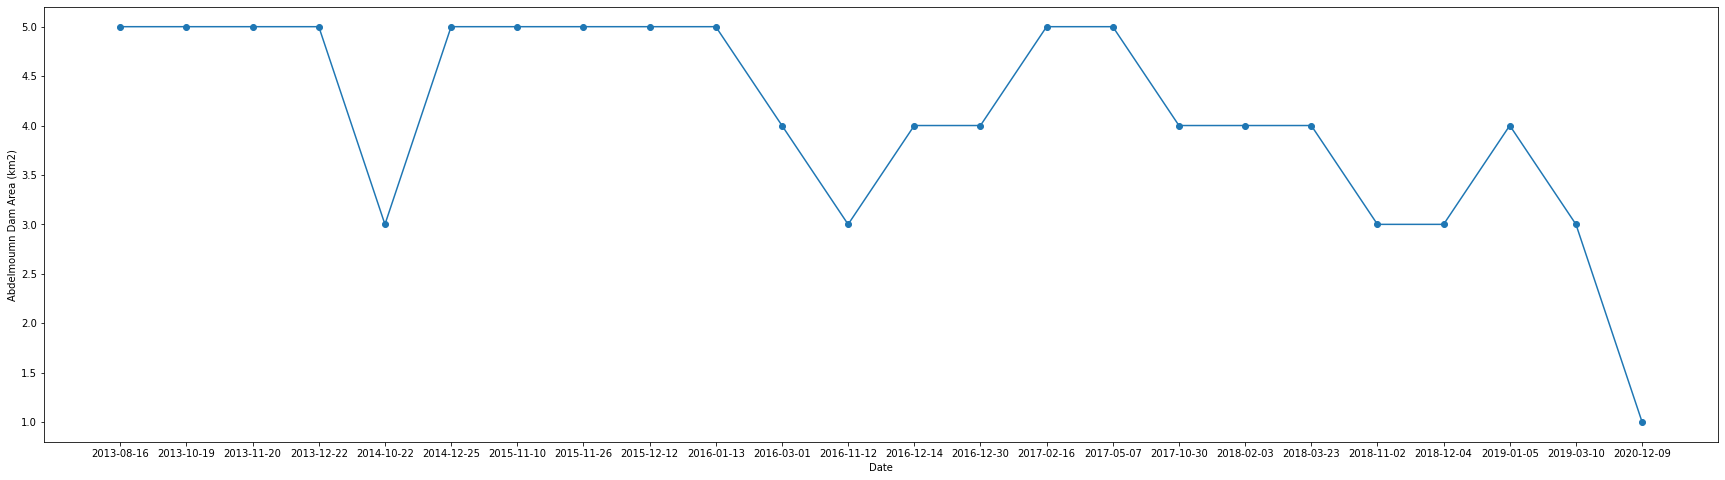

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib qt 

fig= plt.figure(figsize=(30,8))

x = dates.getInfo()
y = areas.getInfo()

plt.plot(x, y, marker='o')
plt.xlabel('Date')
plt.ylabel('Abdelmoumn Dam Area (km2)')
plt.show()

In [186]:
fig.savefig('img.png')

## Create a split-panel map to visualize results

In [78]:
water_images = ndwi_images.map(lambda img: img.selfMask())
landsat_images = images

In [79]:
water_layer_names = ['Water ' + str(date) for date in x]

In [80]:
landsat_layer_names = ['Landsat ' + str(date) for date in x]

In [81]:
water_vis = {
    'palette': 'blue'
}

landsat_vis = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}

In [82]:
Map = geemap.Map()
Map.ts_inspector(left_ts=water_images, right_ts=landsat_images, left_names=water_layer_names, right_names=landsat_layer_names, left_vis=water_vis, right_vis=landsat_vis)
Map.centerObject(roi, zoom=8)
Map

Map(center=[36.06462, -114.762293], controls=(WidgetControl(options=['position'], widget=Dropdown(layout=Layou…

In [84]:
layer_index = 9  # Change this index to your desired date
print("Image date: {}".format(x[layer_index]))

water_image = ee.Image(water_images.toList(water_images.size()).get(layer_index))
landsat_image = ee.Image(landsat_images.toList(landsat_images.size()).get(layer_index))


left_layer = geemap.ee_tile_layer(water_image, water_vis, 'Water')
right_layer = geemap.ee_tile_layer(landsat_image, landsat_vis, 'Landsat')

Map = geemap.Map()
Map.addLayer(landsat_image, landsat_vis, 'Landsat')
Map.split_map(left_layer, right_layer)
Map.centerObject(roi, zoom=12)
Map

Image date: 2019-10-07


Map(center=[36.06462, -114.762293], controls=(WidgetControl(options=['position'], widget=HBox(children=(Toggle…

## Export results to Google Drive

In [85]:
geemap.ee_export_image_collection_to_drive(water_images, folder='export', scale=90)

Total number of images: 10

Exporting LC08_039035_20150724 ...
Exporting LC08_039035_20151012 ...
Exporting LC08_039035_20160912 ...
Exporting LC08_039035_20170627 ...
Exporting LC08_039035_20170814 ...
Exporting LC08_039035_20180918 ...
Exporting LC08_039035_20181105 ...
Exporting LC08_039035_20190820 ...
Exporting LC08_039035_20190921 ...
Exporting LC08_039035_20191007 ...


In [86]:
geemap.ee_export_image_to_drive(occurrence.toInt(), description='water_occurrence', folder='export', region=first_ndwi_image
.geometry(), scale=90)

Exporting water_occurrence ...


## Large-scale surface water mapping

In [87]:
import ee
import geemap

In [88]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [89]:
states_shp = geemap.shp_to_ee('../data/us-states.shp')
Map.addLayer(states_shp, {}, 'US States SHP')

The input shapefile could not be found.


AttributeError: 

The image argument in 'addLayer' function must be an instace of one of ee.Image, ee.Geometry, ee.Feature or ee.FeatureCollection.

In [90]:
state_name = 'Nevada'
roi = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.eq('NAME', state_name))
# roi = states_shp.filterBounds(Map.user_roi)
Map.addLayer(ee.Image().paint(roi, 0, 2), {'palette': 'red'}, state_name)

In [91]:
images = geemap.landsat_timeseries(roi=roi, start_year=1984, end_year=2019, start_date='06-01', end_date='09-30')

In [92]:
first_image = ee.Image(images.toList(images.size()).get(0))

In [93]:
landsat_vis = {
    'bands': ['NIR', 'Red', 'Green'],
    'min': 0, 
    'max': 3500
}
Map.addLayer(first_image, landsat_vis, 'First image')

EEException: Geometry.coordinates: GeometryCollections do not have coordinate lists. Use geometries().

In [94]:
layer_names = ['Landsat ' + str(year) for year in range(1984, 2020)]
Map = geemap.Map()
Map.ts_inspector(left_ts=images, right_ts=images, left_names=layer_names, right_names=layer_names, left_vis=landsat_vis, right_vis=landsat_vis)
Map.centerObject(roi, zoom=8)
Map

EEException: Geometry.coordinates: GeometryCollections do not have coordinate lists. Use geometries().

In [95]:
ndwi_threshold = 0
def extract_water(img):
    
    ndwi_image = img.normalizedDifference(['Green', 'NIR'])
    water_image = ndwi_image.gt(ndwi_threshold)
    return water_image

In [96]:
water_images = images.map(extract_water)

In [97]:
Map = geemap.Map()

first_image = ee.Image(images.toList(images.size()).get(0))
landsat_vis = {
    'bands': ['NIR', 'Red', 'Green'],
    'min': 0, 
    'max': 3500
}
Map.addLayer(first_image, landsat_vis, 'First image')

first_water_image = ee.Image(water_images.toList(water_images.size()).get(0)).selfMask()
Map.addLayer(first_water_image, {'palette': 'blue'}, 'First NDWI')

Map

EEException: Geometry.coordinates: GeometryCollections do not have coordinate lists. Use geometries().

In [98]:
layer_index = 0  # Change this index to your desired date
print(layer_names[layer_index])

water_image = ee.Image(water_images.toList(water_images.size()).get(layer_index)).selfMask()
landsat_image = ee.Image(images.toList(images.size()).get(layer_index))

water_vis = {
    'palette': 'blue'
}

landsat_vis = {
  'bands': ['NIR', 'Red', 'Green'],
  'min': 0,
  'max': 4000,
  'gamma': 1.4,
}

left_layer = geemap.ee_tile_layer(water_image, water_vis, 'Water')
right_layer = geemap.ee_tile_layer(landsat_image, landsat_vis, 'Landsat')

Map = geemap.Map()
Map.addLayer(landsat_image, landsat_vis, 'Landsat')
Map.split_map(left_layer, right_layer)
Map.centerObject(roi, zoom=12)
Map

Landsat 1984


EEException: Geometry.coordinates: GeometryCollections do not have coordinate lists. Use geometries().

## Use JRC Global Surface Water Product

In [99]:
import ee
import geemap

In [100]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [101]:
gsw = ee.Image('JRC/GSW1_1/GlobalSurfaceWater')

In [102]:
print(gsw.bandNames().getInfo())

['occurrence', 'change_abs', 'change_norm', 'seasonality', 'recurrence', 'transition', 'max_extent']


In [103]:
occurrence = gsw.select('occurrence')

In [104]:
vis_occurrence = {
  'min':0,
  'max':100,
  'palette': ['red', 'blue']
}

In [105]:
Map.addLayer(occurrence, vis_occurrence, 'Occurrence')

In [106]:
water_mask = occurrence.gt(90).selfMask()
vis_water_mask = {
  'palette': ['white', 'blue']
}

In [107]:
Map.addLayer(water_mask, vis_water_mask, 'Water Mask (>90%)')

In [108]:
Map.setCenter(-74.4557, -8.4289, 11)
Map

Map(bottom=1851.0, center=[-8.4289, -74.4557], controls=(WidgetControl(options=['position'], widget=HBox(child…

In [109]:
change = gsw.select("change_abs")

In [110]:
vis_change = {
    'min':-50,
    'max':50,
    'palette': ['red', 'black', 'limegreen']
}

In [111]:
Map.addLayer(change, vis_change, 'Occurrence change intensity')

In [112]:
transition = gsw.select('transition')

In [113]:
Map.addLayer(transition, {}, 'Transition classes')

In [114]:
label = 'Surface Water Dynamics'
Map.add_landsat_ts_gif(label=label, start_year=1985, start_date='01-01', end_date='12-31', bands=['SWIR1', 'NIR', 'Red'], font_color='white', frames_per_second=10, progress_bar_color='blue')

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\ACER\Downloads\landsat_ts_yyy.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.
